In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("../data/train.csv").sample(frac=1.0)
test = pd.read_csv("../data/test.csv")
submission = pd.read_csv("../data/sample_submission.csv")

f_cols = [col for col in train.columns if col not in ["id", "target"]]

In [3]:
def get_predictions(x):
    return [1 if xi >= 0.5 else 0 for xi in x]

In [4]:
X, y = train[f_cols].values, train["target"].values

In [5]:
X.shape

(250, 300)

In [6]:
loo = LeaveOneOut()
preds = np.zeros(len(y))
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    clf = LogisticRegression(random_state=0, C=1.).fit(X_train, y_train)
    preds[test_index] = clf.predict_proba(X_test)[:,1]

print(f"Models AUC score: {roc_auc_score(y, preds)}")
print(classification_report(y, get_predictions(preds)))

Models AUC score: 0.7685416666666666
              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57        90
         1.0       0.75      0.82      0.79       160

    accuracy                           0.72       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.71      0.72      0.71       250



In [7]:
# Logreg MLE
log_reg = LogisticRegression(random_state=0, C=1.0).fit(X, y)

In [8]:
X_test = test[f_cols].values
y_pred = log_reg.predict_proba(X_test)[:,1]
submission["target"] = y_pred

In [9]:
# LB result 0.74
submission.to_csv("../submissions/09_logreg_MLE.csv", index=False)

In [10]:
# Score 0.740
submission.head()

,id,target
0,250,0.247957
1,251,0.065619
2,252,0.758937
3,253,0.999923
4,254,0.278511


## Small logreg

In [11]:
sort_idx = np.argsort(np.abs(log_reg.coef_))
sort_coef_vals = np.abs(log_reg.coef_)[0][sort_idx[0]]

In [12]:
feature_idx = sort_idx[0][-20:]

In [13]:
loo = LeaveOneOut()
preds = np.zeros(len(y))
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[:,feature_idx][train_index], X[:,feature_idx][test_index]
    y_train = y[train_index]
    clf = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train, y_train)
    preds[test_index] = clf.predict_proba(X_test)[:,1]

print(f"Models AUC score: {roc_auc_score(y, preds)}")
print(classification_report(y, get_predictions(preds)))

Models AUC score: 0.8890972222222222
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75        90
         1.0       0.87      0.82      0.85       160

    accuracy                           0.81       250
   macro avg       0.79      0.80      0.80       250
weighted avg       0.81      0.81      0.81       250



In [14]:
log_reg = LogisticRegression(random_state=0, class_weight="balanced").fit(X[:,feature_idx], y)

In [15]:
# 0.801
X_test = test[f_cols].values[:,feature_idx]
y_pred = log_reg.predict_proba(X_test)[:,1]
submission["target"] = y_pred
submission.to_csv("../submissions/02_weigthed_logreg_20features.csv", index=False)
submission.head()

,id,target
0,250,0.901263
1,251,0.368110
2,252,0.875366
3,253,0.988967
4,254,0.210552


# Gaussian logreg

## MAP l2 estimate C=0.3

In [16]:
loo = LeaveOneOut()
preds = np.zeros(len(y))
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    clf = LogisticRegression(random_state=0, C=.3, penalty="l2", solver='liblinear').fit(X_train, y_train)
    preds[test_index] = clf.predict_proba(X_test)[:,1]

print(f"Models AUC score: {roc_auc_score(y, preds)}")
print(classification_report(y, get_predictions(preds)))

Models AUC score: 0.7697916666666667
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        90
         1.0       0.78      0.74      0.76       160

    accuracy                           0.70       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.71      0.70      0.70       250



In [17]:
log_reg = LogisticRegression(random_state=0, C=.3, penalty="l2").fit(X_train, y_train)

In [18]:
# 0.741
X_test = test[f_cols].values
y_pred = log_reg.predict_proba(X_test)[:,1]
submission["target"] = y_pred
submission.to_csv("../submissions/12_logreg_MAP_l2_c_05.csv", index=False)
submission.head()

,id,target
0,250,0.392841
1,251,0.151930
2,252,0.742124
3,253,0.999659
4,254,0.388465


## Small map

In [19]:
sort_idx = np.argsort(np.abs(log_reg.coef_))
sort_coef_vals = np.abs(log_reg.coef_)[0][sort_idx[0]]

In [20]:
feature_idx = sort_idx[0][-20:]

In [21]:
loo = LeaveOneOut()
preds = np.zeros(len(y))
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[:,feature_idx][train_index], X[:,feature_idx][test_index]
    y_train = y[train_index]
    clf = LogisticRegression(random_state=0, C=.3, penalty="l2", class_weight="balanced").fit(X_train, y_train)
    preds[test_index] = clf.predict_proba(X_test)[:,1]

print(f"Models AUC score: {roc_auc_score(y, preds)}")
print(classification_report(y, get_predictions(preds)))

Models AUC score: 0.8941666666666666
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73        90
         1.0       0.86      0.82      0.84       160

    accuracy                           0.80       250
   macro avg       0.78      0.79      0.79       250
weighted avg       0.81      0.80      0.80       250



In [22]:
log_reg = LogisticRegression(random_state=0, C=.3, penalty="l2", class_weight="balanced").fit(X[:,feature_idx], y)

In [23]:
# 0.801
X_test = test[f_cols].values[:,feature_idx]
y_pred = log_reg.predict_proba(X_test)[:,1]
submission["target"] = y_pred
submission.to_csv("../submissions/16_weigthed_logreg_20features_MAP.csv", index=False)
submission.head()

,id,target
0,250,0.900207
1,251,0.426539
2,252,0.775134
3,253,0.985436
4,254,0.242917


# Slap-and-spike prior

In [24]:
import pymc3 as pm
import theano as tt
from scipy.special import expit
from scipy.stats import norm, bernoulli

In [25]:
X, y = train[f_cols].values, train["target"].values

This is our slab and spike model

$$a \sim \mathcal{N}(0, 3)$$
$$\gamma_i \sim Bernoulli(p=0.1)$$
$$\alpha_i|\sigma_\beta \sim \mathcal{N}(0, \sigma_\beta)$$
$$e \sim \mathcal{N}(0, \sigma^2_eI_n)$$
$$y \sim \frac{1}{1+exp(-(a + \sum_{i=1}^N \gamma_i \alpha_i x_i + e))}$$

The model parameters are $\theta = \{\gamma_i, \alpha_i\}_i^N $. The $\gamma_i$ and $\alpha_i$ are modelled IID.

In [26]:
# This model is inspired by the following notebook
# https://www.kaggle.com/melondonkey/bayesian-spike-and-slab-in-pymc3
prob = 0.1
a_mu = 0
a_var = 3
gamma_var = 1
with pm.Model() as model:
    # priors inclusion probability
    gamma_i = pm.Bernoulli("gamma_i", prob, shape=X.shape[1])
    # a is the interception
    a = pm.Normal("a", mu=a_mu, sd=a_var)
    # The prior for the features varibles which are included
    alpha = pm.Normal("alpha", mu=0, sd=gamma_var, shape=X.shape[1])
    # Deterministic function
    p = pm.math.dot(X,gamma_i * alpha) 
    # Likelihood
    y_obs = pm.Bernoulli("y_obs", pm.invlogit(p + a),  observed=y)
 

In [27]:
with model:
    trace = pm.sample(4000, random_seed = 37, cores = 1, progressbar = True, chains = 1)

/var/folders/bx/2b_70g054qg3qt5jhnw30xv40000gn/T/ipykernel_30915/4107618077.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(4000, random_seed = 37, cores = 1, progressbar = True, chains = 1)
Sequential sampling (1 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [gamma_i]
>NUTS: [alpha, a]


Sampling 1 chain for 1_000 tune and 4_000 draw iterations (1_000 + 4_000 draws total) took 150 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


# Map estimate

The log loss for the spike and slap prior
$$p(\theta) = p(\{\gamma_i, \alpha_i\}_i^N) = \prod_{i=1}^N p(\gamma_i) p(\alpha_i)$$

$$\log p(\theta) = \sum_{i=1}^N \log Bernoulli(\gamma_i | p=0.1) + \log \mathcal{N}(\alpha_i | \mu=0, \sigma_\beta=3)$$

In [28]:
def spike_slab_log_prior(gamma: np.array, alpha: np.array, p, gamma_mu=0, sigma_beta=3):
    return (bernoulli.logpmf(gamma, p=p) + norm.logpdf(alpha, loc=gamma_mu, scale=sigma_beta)).sum()

The negative log likelihood function, i.e. cross entropy

$$E(\mathbf{w}) = -log(p(\pmb{\mathbf{t}}|\pmb{\mathbf{x}},\mathbf{w})) \nonumber$$

$$= - \sum_{n=1}^N \left( t_n \ln y(\mathbf{x}_n) + (1-t_n) \ln (1-y(\mathbf{x}_n)) \right)$$
  

In [29]:
def log_likelihood(a, gamma, alpha, X, T):
    y_x = expit(a + np.dot(X, np.transpose(gamma*alpha)))
    return (T*np.log(y_x) + ((1-T)*np.log(1-y_x))).sum()

In [30]:
prob = 0.1
gamma_mu = 0
sigma_beta = 3

def find_spike_slab_MAP(trace, X, y, prob, gamma_mu, sigma_beta):
    min_loss = np.inf
    cur_min = -1
    for i in range(len(trace)):
        tmp_trace = trace[i]
        tmp_spike_slab_log_prior = spike_slab_log_prior(tmp_trace["gamma_i"], tmp_trace["alpha"], p=prob, gamma_mu=gamma_mu, sigma_beta=sigma_beta)
        tmp_log_likelihood = log_likelihood(tmp_trace["a"], tmp_trace["gamma_i"], tmp_trace["alpha"], X, y)
        neq_loss = -(tmp_log_likelihood + tmp_spike_slab_log_prior)
        if neq_loss <= min_loss:
            min_loss = neq_loss
            cur_min = i
    return trace[cur_min]
    

In [31]:
map_trace = find_spike_slab_MAP(trace, X, y, prob, gamma_mu, sigma_beta)

In [32]:
map_estimate = map_trace["gamma_i"] * map_trace["alpha"]

X_test = test[f_cols].values
map_preds = expit(map_trace["a"] + np.dot(X_test, np.transpose(map_estimate)))

In [33]:
map_preds

array([0.99921077, 0.35600056, 0.99270859, ..., 0.02179709, 0.9978996 ,
       0.98971878])

In [34]:
# 0.803
submission["target"] = map_preds
submission.to_csv("../submissions/14_sas_MAP_logreg.csv", index=False)
submission.head()

,id,target
0,250,0.999211
1,251,0.356001
2,252,0.992709
3,253,0.999916
4,254,0.100452


# Full Bayesian



## Bayesian inference

In [35]:
estimate = trace['alpha'] * trace['gamma_i'] 
X_test = test[f_cols].values
preds = np.apply_along_axis(np.mean, 1, expit(trace['a'] + np.dot(X_test, np.transpose(estimate))))

In [36]:
# 0.854
submission["target"] = preds
submission.to_csv("../submissions/15_sas_Bayesian_logreg.csv", index=False)
submission.head()

,id,target
0,250,0.828190
1,251,0.728332
2,252,0.858717
3,253,0.989215
4,254,0.489214


In [37]:
preds[:10]

array([0.82818959, 0.72833158, 0.85871703, 0.98921512, 0.48921393,
       0.3627952 , 0.40381304, 0.2214204 , 0.94148975, 0.22909256])

In [38]:
map_preds[:10]

array([0.99921077, 0.35600056, 0.99270859, 0.99991579, 0.10045174,
       0.60309571, 0.03386489, 0.23655551, 0.96052939, 0.0131992 ])

In [39]:
(map_preds[map_preds > 0.5]).mean(), (map_preds[map_preds <= 0.5]).mean()

(0.9256356485014586, 0.12008208417522423)

In [40]:
(preds[preds > 0.5]).mean(), (preds[preds <= 0.5]).mean()

(0.8283539638076304, 0.254201777761141)

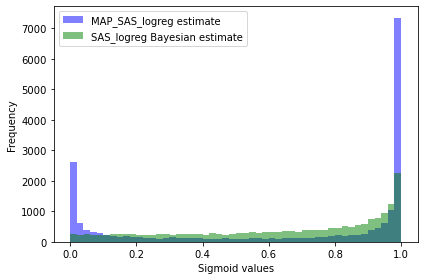

In [41]:
plt.hist(map_preds, bins=50, color="blue", alpha=0.5, label="MAP_SAS_logreg estimate")
plt.hist(preds, bins=50, color="green", alpha=0.5, label="SAS_logreg Bayesian estimate")
plt.xlabel("Sigmoid values")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("softmax_values.png")
plt.show()
